In [1]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import plotly.graph_objs as go

In [2]:
import pandas as pd
import numpy as np

df = pd.read_excel('books_variation.xlsx')
df.head()

,title,date,price
0,The Immortals of Meluha,2019-01-24,254
1,The Immortals of Meluha,2019-01-25,254
2,The Immortals of Meluha,2019-01-26,296
3,The Immortals of Meluha,2019-01-27,221
4,The Immortals of Meluha,2019-01-28,221


In [3]:
book1 = df.loc[df['title'] == 'The Immortals of Meluha']
book1 = book1.drop(columns='title')
book1

,date,price
0,2019-01-24,254
1,2019-01-25,254
2,2019-01-26,296
3,2019-01-27,221
4,2019-01-28,221
5,2019-01-29,182
6,2019-01-30,221
7,2019-01-31,182
8,2019-02-01,182
9,2019-02-02,182


In [4]:
book1['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
indexed_book1 = book1.set_index(['date'])
indexed_book1.index

DatetimeIndex(['2019-01-24', '2019-01-25', '2019-01-26', '2019-01-27',
               '2019-01-28', '2019-01-29', '2019-01-30', '2019-01-31',
               '2019-02-01', '2019-02-02', '2019-02-03', '2019-02-04',
               '2019-02-05', '2019-02-06'],
              dtype='datetime64[ns]', name='date', freq=None)

In [5]:
data = [go.Scatter(x= indexed_book1.index, y= indexed_book1.price)]
plot(data, filename='basic-line')

C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `basic-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\Python Project\\basic-line.html'

In [6]:
#Determining rolling statistics
rollmean = indexed_book1.rolling(window='14d').mean()  #monthly basis
rollstd = indexed_book1.rolling(window='14d').std()
rollmean, rollstd

(                 price
 date                  
 2019-01-24  254.000000
 2019-01-25  254.000000
 2019-01-26  268.000000
 2019-01-27  256.250000
 2019-01-28  249.200000
 2019-01-29  238.000000
 2019-01-30  235.571429
 2019-01-31  228.875000
 2019-02-01  223.666667
 2019-02-02  219.500000
 2019-02-03  222.636364
 2019-02-04  225.250000
 2019-02-05  221.846154
 2019-02-06  218.928571,                 price
 date                 
 2019-01-24        NaN
 2019-01-25   0.000000
 2019-01-26  24.248711
 2019-01-27  30.728651
 2019-01-28  30.930567
 2019-01-29  38.961519
 2019-01-30  36.142575
 2019-01-31  38.450107
 2019-02-01  39.214156
 2019-02-02  39.249204
 2019-02-03  38.660762
 2019-02-04  37.957213
 2019-02-05  38.357629
 2019-02-06  38.435689)

In [113]:
#Plotting Rolling Statistics

trace1 = go.Scatter(x= indexed_book1.index, y= indexed_book1.price, name='Original')
trace2 = go.Scatter(x= rollmean.index , y= rollmean.price, name= 'Rolling Mean')
trace3 = go.Scatter(x= rollstd.index , y= rollstd.price, name= 'Rolling Std')
data = [trace1, trace2, trace3]
    # Edit the layout
layout = dict(title = 'Rolling Mean and Standard Deviation',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Price')
              )
fig = dict(data=data, layout=layout)
plot(fig, filename='styled-line')

C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `styled-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\styled-line.html'

In [7]:
#Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(indexed_book1['price'], autolag='AIC')
dfout = pd.Series(dftest[0:4], index= ['Test statistic','p-value','lags used','number of observations used'])
for key,value in dftest[4].items():
    dfout['Critical value (%s)'%key] = value
print(dfout)


Test statistic                 0.000000
p-value                        0.958532
lags used                      6.000000
number of observations used    7.000000
Critical value (1%)           -4.938690
Critical value (5%)           -3.477583
Critical value (10%)          -2.843868
dtype: float64


C:\Users\Shefali\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1510: RuntimeWarning:

divide by zero encountered in double_scalars



In [54]:
#The test statistic is positive, meaning we are much less likely to reject the null hypothesis (it looks non-stationary).
#Comparing the test statistic to the critical values, it looks like we would have to fail to reject the null hypothesis 
#that the time series is non-stationary and does have time-dependent structure.

In [8]:
# Moving Average with timeseries

moving_avg = indexed_book1.rolling(window='14d').mean()
moving_std = indexed_book1.rolling(window='14d').std()
moving_avg, moving_std

(                 price
 date                  
 2019-01-24  254.000000
 2019-01-25  254.000000
 2019-01-26  268.000000
 2019-01-27  256.250000
 2019-01-28  249.200000
 2019-01-29  238.000000
 2019-01-30  235.571429
 2019-01-31  228.875000
 2019-02-01  223.666667
 2019-02-02  219.500000
 2019-02-03  222.636364
 2019-02-04  225.250000
 2019-02-05  221.846154
 2019-02-06  218.928571,                 price
 date                 
 2019-01-24        NaN
 2019-01-25   0.000000
 2019-01-26  24.248711
 2019-01-27  30.728651
 2019-01-28  30.930567
 2019-01-29  38.961519
 2019-01-30  36.142575
 2019-01-31  38.450107
 2019-02-01  39.214156
 2019-02-02  39.249204
 2019-02-03  38.660762
 2019-02-04  37.957213
 2019-02-05  38.357629
 2019-02-06  38.435689)

In [57]:
trace1 = go.Scatter(x= indexed_book1.index, y= indexed_book1.price)
trace2 = go.Scatter(x= moving_avg.index , y= moving_avg.price)
data = [trace1, trace2]
plot(data, filename='basic-line')


C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `basic-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\basic-line.html'

In [9]:
#Difference between log timeseries and moving average

logminusMA = indexed_book1 - moving_avg
logminusMA

,price
date,
2019-01-24,0.000000
2019-01-25,0.000000
2019-01-26,28.000000
2019-01-27,-35.250000
2019-01-28,-28.200000
2019-01-29,-56.000000
2019-01-30,-14.571429
2019-01-31,-46.875000
2019-02-01,-41.666667


In [59]:
#Determining the Stationarity of data

moving_avg = logminusMA.rolling(window='14d').mean()
moving_std = logminusMA.rolling(window='14d').std()
    
trace1 = go.Scatter(x= logminusMA.index, y= logminusMA.price, name='Original')
trace2 = go.Scatter(x= moving_avg.index , y= moving_avg.price, name= 'Rolling Mean')
trace3 = go.Scatter(x= moving_std.index , y= moving_std.price, name= 'Rolling Std')
data = [trace1, trace2, trace3]
    # Edit the layout
layout = dict(title = 'Rolling Mean and Standard Deviation',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Price'))
fig = dict(data=data, layout=layout)
plot(fig, filename='styled-line')

C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `styled-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\styled-line.html'

In [10]:
print("Results of Dickey-Fuller test: ")
dftest = adfuller(logminusMA['price'], autolag='AIC')
dfout = pd.Series(dftest[0:4], index= ['Test statistic','p-value','lags used','number of observations used'])
for key,value in dftest[4].items():
    dfout['Critical value (%s)'%key] = value
print(dfout)

Results of Dickey-Fuller test: 
Test statistic                -0.000000
p-value                        0.958532
lags used                      7.000000
number of observations used    6.000000
Critical value (1%)           -5.354256
Critical value (5%)           -3.646238
Critical value (10%)          -2.901198
dtype: float64


In [61]:
#If you notice above, the p-value 0.020828 is relatively less that before which was 0.958532
#Also, the Critical value and Test statistic value is almost equal which helps to determine whether data is stationary or not

# Here timeseries is stationary and null-hypothesis is rejected

In [11]:
#Calculate the weighted average to see the trend
#DataFrame.ewm : Provides exponential weighted functions

weighted_avg = indexed_book1.ewm(com=0.5).mean()
weighted_avg

,price
date,
2019-01-24,254.000000
2019-01-25,254.000000
2019-01-26,283.076923
2019-01-27,241.175000
2019-01-28,227.669421
2019-01-29,197.181319
2019-01-30,213.067704
2019-01-31,192.352744
2019-02-01,185.450564


In [111]:
trace1 = go.Scatter(x= indexed_book1.index, y= indexed_book1.price)
trace2 = go.Scatter(x= weighted_avg.index , y= weighted_avg.price)
data = [trace1, trace2]
plot(data, filename='basic-line')

#As you can see, the trend is moving with the logged data with respect to time

C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `basic-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\basic-line.html'

In [12]:
#Difference between timeseries and weighted average

logminusWA = indexed_book1 - weighted_avg
print(logminusWA)

#Determining the Stationarity of data

moving_avg = logminusWA.rolling(window='14d').mean()
moving_std = logminusWA.rolling(window='14d').std()
    
trace1 = go.Scatter(x= logminusWA.index, y= logminusWA.price, name='Original')
trace2 = go.Scatter(x= moving_avg.index , y= moving_avg.price, name= 'Rolling Mean')
trace3 = go.Scatter(x= moving_std.index , y= moving_std.price, name= 'Rolling Std')
data = [trace1, trace2, trace3]
    # Edit the layout
layout = dict(title = 'Rolling Mean and Standard Deviation',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Price'))
fig = dict(data=data, layout=layout)
plot(fig, filename='styled-line')

                price
date                 
2019-01-24   0.000000
2019-01-25   0.000000
2019-01-26  12.923077
2019-01-27 -20.175000
2019-01-28  -6.669421
2019-01-29 -15.181319
2019-01-30   7.932296
2019-01-31 -10.352744
2019-02-01  -3.450564
2019-02-02  -1.150149
2019-02-03  23.616350
2019-02-04   7.872087
2019-02-05 -21.709277
2019-02-06  -7.236423


C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `styled-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\Python Project\\styled-line.html'

In [13]:
print("Results of Dickey-Fuller test: ")
dftest = adfuller(logminusWA['price'], autolag='AIC')
dfout = pd.Series(dftest[0:4], index= ['Test statistic','p-value','lags used','number of observations used'])
for key,value in dftest[4].items():
    dfout['Critical value (%s)'%key] = value
print(dfout)

Results of Dickey-Fuller test: 
Test statistic                -0.000000
p-value                        0.958532
lags used                      8.000000
number of observations used    5.000000
Critical value (1%)           -6.045114
Critical value (5%)           -3.929280
Critical value (10%)          -2.986810
dtype: float64


In [68]:
# No difference in the p-value from original data and weighted average data
# Here timeseries is not stationary

In [15]:
#Shifting the values

indexed_book1_diffshift = indexed_book1 - indexed_book1.shift()
indexed_book1_diffshift = indexed_book1_diffshift.dropna()
data = [go.Scatter(x= indexed_book1_diffshift.index, y= indexed_book1_diffshift.price)]
plot(data, filename='basic-line')

C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `basic-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\Python Project\\basic-line.html'

In [76]:
indexed_book1_logscale_diffshift.dropna(inplace=True)

#Determining the Stationarity of data

moving_avg = indexed_book1_diffshift.rolling(window='14d').mean()
moving_std = indexed_book1_diffshift.rolling(window='14d').std()
    
trace1 = go.Scatter(x= indexed_book1_diffshift.index, y= indexed_book1_diffshift.price, name='Original')
trace2 = go.Scatter(x= moving_avg.index , y= moving_avg.price, name= 'Rolling Mean')
trace3 = go.Scatter(x= moving_std.index , y= moving_std.price, name= 'Rolling Std')
data = [trace1, trace2, trace3]
    # Edit the layout
layout = dict(title = 'Rolling Mean and Standard Deviation',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Price'))
fig = dict(data=data, layout=layout)
plot(fig, filename='styled-line')

C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `styled-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\styled-line.html'

In [16]:
print("Results of Dickey-Fuller test: ")
dftest = adfuller(indexed_book1_diffshift['price'], autolag='AIC')
dfout = pd.Series(dftest[0:4], index= ['Test statistic','p-value','lags used','number of observations used'])
for key,value in dftest[4].items():
    dfout['Critical value (%s)'%key] = value
print(dfout)

# Here timeseries is stationary and null-hypothesis is rejected

Results of Dickey-Fuller test: 
Test statistic                -0.000000
p-value                        0.958532
lags used                      6.000000
number of observations used    6.000000
Critical value (1%)           -5.354256
Critical value (5%)           -3.646238
Critical value (10%)          -2.901198
dtype: float64


C:\Users\Shefali\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1510: RuntimeWarning:

divide by zero encountered in double_scalars



In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(indexed_book1)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

from plotly import tools

trace1 = go.Scatter(x= indexed_book1.index, y= indexed_book1.price, name='Original')
trace2 = go.Scatter(x= trend.index, y= trend.price, name='Trend')
trace3 = go.Scatter(x= seasonal.index, y= seasonal.price, name='Seasonality')
trace4 = go.Scatter(x= residual.index, y= residual.price, name='Residual')

fig = tools.make_subplots(rows=4, cols=1)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 3, 1)
fig.append_trace(trace4, 4, 1)


fig['layout'].update(title='Stacked subplots')
plot(fig, filename='stacked-subplots')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]
[ (3,1) x3,y3 ]
[ (4,1) x4,y4 ]



C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `stacked-subplots` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\Python Project\\stacked-subplots.html'

In [18]:
#Residuals are irregualr in nature
#So checking noise stationarity

decomposed_logdata = residual
decomposed_logdata.dropna(inplace=True)

#Determining the Stationarity of data

moving_avg = decomposed_logdata.rolling(window='14d').mean()
moving_std = decomposed_logdata.rolling(window='14d').std()
    
trace1 = go.Scatter(x= decomposed_logdata.index, y= decomposed_logdata.price, name='Original')
trace2 = go.Scatter(x= moving_avg.index , y= moving_avg.price, name= 'Rolling Mean')
trace3 = go.Scatter(x= moving_std.index , y= moving_std.price, name= 'Rolling Std')
data = [trace1, trace2, trace3]
    # Edit the layout
layout = dict(title = 'Rolling Mean and Standard Deviation',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Price'))
fig = dict(data=data, layout=layout)
plot(fig, filename='styled-line')

C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `styled-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\Python Project\\styled-line.html'

In [19]:
#ACF and PACF plots

from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(indexed_book1_diffshift)
lag_pacf = pacf(indexed_book1_diffshift)
#lag_acf,lag_pacf

#ACF
#trace1 = go.Scatter(y= lag_acf, name='Autocorrelation Function', type='bar')
trace1 = {"y": lag_acf, "name": "Autocorrelation Function", "type": "bar"}
trace2 = {"y": lag_pacf, "name": "Partial Autocorrelation Function", "type": "bar"}
#trace2 = go.Scatter(y= lag_pacf, name='Partial Autocorrelation Function', type='bar')

data = [trace1, trace2]
layout = dict(title = 'ACF and PACF Plots')
fig = dict(data=data, layout=layout)
plot(fig)

C:\Users\Shefali\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning:

invalid value encountered in sqrt

C:\Users\Shefali\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1275: RuntimeWarning:

invalid value encountered in double_scalars



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\Python Project\\temp-plot.html'

In [20]:
#AR Model
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(indexed_book1, order= (3,1,0))
results_AR = model.fit(disp=-1)

print("Plotting AR Model...")
trace1 = go.Scatter(x= indexed_book1.index, y= indexed_book1.price, name='Original')
trace2 = go.Scatter(y=results_AR.fittedvalues, name='AR fitted values')

data = [trace1, trace2]
layout = dict(title = 'RSS: %.4f'%sum((results_AR.fittedvalues-indexed_book1.price)**2))
fig = dict(data=data, layout=layout)
plot(fig)

C:\Users\Shefali\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Shefali\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Shefali\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Shefali\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, w

Plotting AR Model...


'file://C:\\Users\\Shefali\\Desktop\\PY Work\\Python Project\\temp-plot.html'

In [21]:
#MA Model
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(indexed_book1, order= (0,1,1))
results_MA = model.fit(disp=-1)

print("Plotting MA Model...")
trace1 = go.Scatter(x= indexed_book1_diffshift.index, y= indexed_book1_diffshift.price, name='Original')
trace2 = go.Scatter(y=results_MA.fittedvalues, name='MA fitted values')

data = [trace1, trace2]
layout = dict(title = 'RSS: %.4f'%sum((results_MA.fittedvalues-indexed_book1_diffshift.price)**2))
fig = dict(data=data, layout=layout)
plot(fig)

C:\Users\Shefali\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Shefali\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Plotting MA Model...


'file://C:\\Users\\Shefali\\Desktop\\PY Work\\Python Project\\temp-plot.html'

In [31]:
#AR Model is better as it has less RSS value than MA Model

In [22]:
prediction = pd.Series(results_AR.fittedvalues, copy=True)
print(prediction)

prediction_cumsum = prediction.cumsum()
print(prediction_cumsum)

date
2019-01-25    -3.945336
2019-01-26    -5.031907
2019-01-27   -19.320945
2019-01-28     7.077758
2019-01-29    -7.871393
2019-01-30    52.045776
2019-01-31   -11.813760
2019-02-01    16.499225
2019-02-02   -18.907880
2019-02-03    14.062782
2019-02-04   -39.554510
2019-02-05   -35.056461
2019-02-06   -22.055026
dtype: float64
date
2019-01-25    -3.945336
2019-01-26    -8.977243
2019-01-27   -28.298188
2019-01-28   -21.220430
2019-01-29   -29.091822
2019-01-30    22.953954
2019-01-31    11.140194
2019-02-01    27.639419
2019-02-02     8.731539
2019-02-03    22.794322
2019-02-04   -16.760188
2019-02-05   -51.816649
2019-02-06   -73.871675
dtype: float64


In [23]:
prediction_log = pd.Series(indexed_book1.price.ix[0], index = indexed_book1.index)
prediction_log = prediction_log.add(prediction_cumsum, fill_value=0)
prediction_log

C:\Users\Shefali\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



date
2019-01-24    254.000000
2019-01-25    250.054664
2019-01-26    245.022757
2019-01-27    225.701812
2019-01-28    232.779570
2019-01-29    224.908178
2019-01-30    276.953954
2019-01-31    265.140194
2019-02-01    281.639419
2019-02-02    262.731539
2019-02-03    276.794322
2019-02-04    237.239812
2019-02-05    202.183351
2019-02-06    180.128325
dtype: float64

In [24]:
prediction_ARIMA = np.exp(prediction_log)

trace1 = go.Scatter(x= indexed_book1.index, y= indexed_book1.price, name='Original data')
trace2 = go.Scatter(y=prediction_ARIMA, name='prdiction')

data = [trace1, trace2]
layout = dict(title = "Predictions")
fig = dict(data=data, layout=layout)
plot(fig)

'file://C:\\Users\\Shefali\\Desktop\\PY Work\\Python Project\\temp-plot.html'

In [56]:
indexed_book1

,price
date,
2019-01-24,254
2019-01-25,254
2019-01-26,296
2019-01-27,221
2019-01-28,221
2019-01-29,182
2019-01-30,221
2019-01-31,182
2019-02-01,182


(array([197.65848168, 225.17419144, 198.32295184, 180.37390632,
        171.5584369 , 188.41589179, 185.90511039, 176.8661852 ,
        162.04100864, 163.61015975, 164.29528695, 162.98151793,
        152.96737999, 147.84404667]),
 array([31.34140196, 36.2452528 , 38.35092941, 38.35842734, 41.41368093,
        44.76518577, 48.32146045, 49.02423791, 50.28090371, 51.87814229,
        54.60250187, 56.11318799, 57.41751855, 58.53669324]),
 array([[136.2304626 , 259.08650075],
        [154.13480134, 296.21358154],
        [123.15651142, 273.48939226],
        [105.19277024, 255.5550424 ],
        [ 90.38911381, 252.72775999],
        [100.67773992, 276.15404366],
        [ 91.19678822, 280.61343256],
        [ 80.78044452, 272.95192587],
        [ 63.49224826, 260.58976901],
        [ 61.93086929, 265.28945022],
        [ 57.27634981, 271.31422409],
        [ 53.00169041, 272.96134546],
        [ 40.43111155, 265.50364844],
        [ 33.11423615, 262.57385718]]))

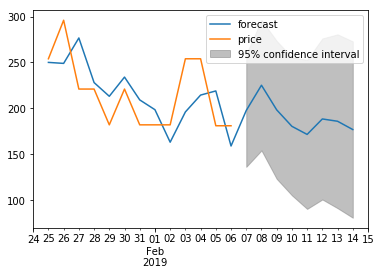

In [55]:
forecast = results_AR.forecast(steps=14)
#print(results_AR.forecast(steps=7))

results_AR.plot_predict(1,21)
results_AR.forecast(steps=14)

In [59]:
forecast = results_AR.forecast(steps=14)[0]
actual = indexed_book1.price.values

# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE(Mean Absolute Percentage Error)
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse})

In [61]:
forecast_accuracy(forecast, actual)

{'mape': 0.18252683418774066,
 'me': -41.927531750637876,
 'mae': 42.844087720889846,
 'mpe': -0.17749081237316938,
 'rmse': 52.0255503981222}

### Around 18.25% MAPE implies the model is about 81.75% accurate in predicting the next 14 observations.